          0         1   2
0 -0.190176 -0.195489 NaN
1 -0.208340  0.107337 NaN
2 -0.487379  0.131786 NaN
3 -0.564656 -0.193942 NaN
4  0.527243 -0.166957 NaN


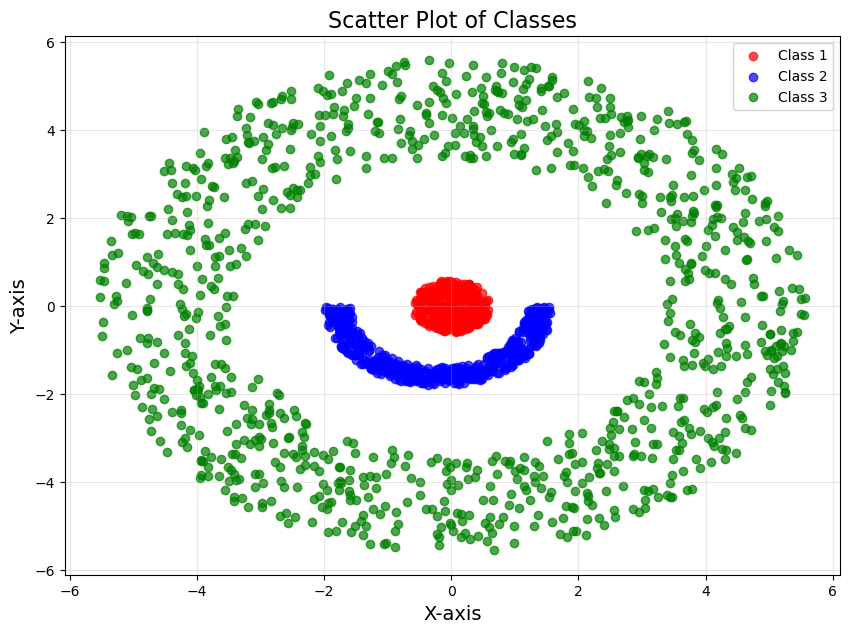

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the new dataset and inspect it
data = pd.read_csv(r'C:\Users\nitip\OneDrive\Desktop\dec2024\Group04[1]\Group04\NLS_Group04.txt', delimiter=' ', header=None)

# Check the first few rows to see the structure
print(data.head())

# Slice the first two columns if there are extra columns
data = data.iloc[:, :2]
data.columns = ['X', 'Y']

# Assign labels: first 300 examples are Class 1, next 500 are Class 2, and last 1000 are Class 3
class_labels = np.concatenate([np.zeros(300), np.ones(500), np.full(1000, 2)])

# Add the labels to the dataset
data['Label'] = class_labels

# Split data into features (X) and labels (y)
X = data[['X', 'Y']]  # Features
y = data['Label']     # Labels

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scatter plot of classes
plt.figure(figsize=(10, 7))
plt.scatter(data[data['Label'] == 0]['X'], data[data['Label'] == 0]['Y'], color='red', label='Class 1', alpha=0.7)
plt.scatter(data[data['Label'] == 1]['X'], data[data['Label'] == 1]['Y'], color='blue', label='Class 2', alpha=0.7)
plt.scatter(data[data['Label'] == 2]['X'], data[data['Label'] == 2]['Y'], color='green', label='Class 3', alpha=0.7)
plt.title("Scatter Plot of Classes", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


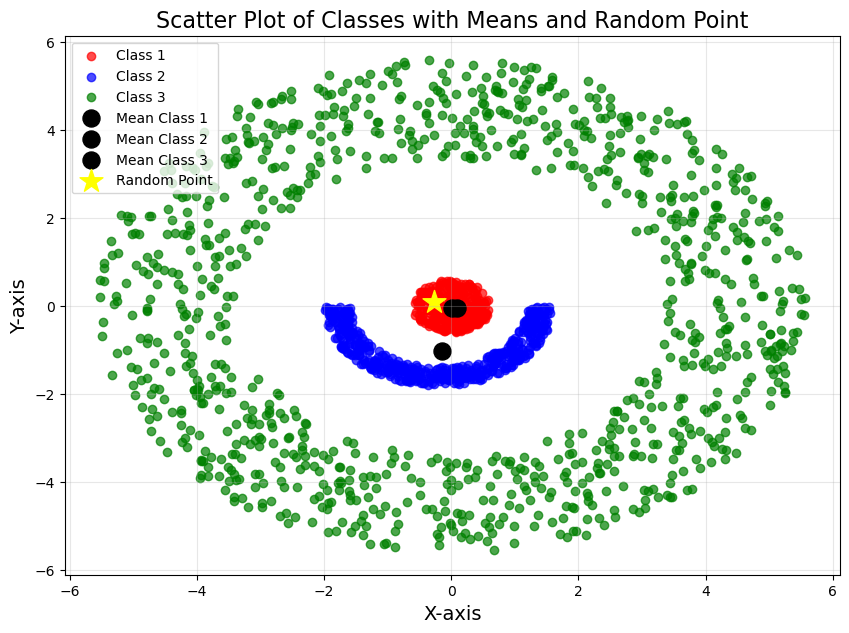

In [2]:
# Calculate the mean of each class manually
mean_class1 = [sum(data[data['Label'] == 0]['X']) / len(data[data['Label'] == 0]), 
               sum(data[data['Label'] == 0]['Y']) / len(data[data['Label'] == 0])]
mean_class2 = [sum(data[data['Label'] == 1]['X']) / len(data[data['Label'] == 1]), 
               sum(data[data['Label'] == 1]['Y']) / len(data[data['Label'] == 1])]
mean_class3 = [sum(data[data['Label'] == 2]['X']) / len(data[data['Label'] == 2]), 
               sum(data[data['Label'] == 2]['Y']) / len(data[data['Label'] == 2])]

# Store the class means
class_means = {
    'Class 1': mean_class1,
    'Class 2': mean_class2,
    'Class 3': mean_class3
}

# Select a random point from the test set
random_point = X.sample(n=1).values.flatten()

# Plot means and random point
plt.figure(figsize=(10, 7))
plt.scatter(data[data['Label'] == 0]['X'], data[data['Label'] == 0]['Y'], color='red', label='Class 1', alpha=0.7)
plt.scatter(data[data['Label'] == 1]['X'], data[data['Label'] == 1]['Y'], color='blue', label='Class 2', alpha=0.7)
plt.scatter(data[data['Label'] == 2]['X'], data[data['Label'] == 2]['Y'], color='green', label='Class 3', alpha=0.7)
plt.scatter(mean_class1[0], mean_class1[1], color='black', marker='o', s=150, label='Mean Class 1')
plt.scatter(mean_class2[0], mean_class2[1], color='black', marker='o', s=150, label='Mean Class 2')
plt.scatter(mean_class3[0], mean_class3[1], color='black', marker='o', s=150, label='Mean Class 3')
plt.scatter(random_point[0], random_point[1], color='yellow', marker='*', s=300, label='Random Point')
plt.title("Scatter Plot of Classes with Means and Random Point", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


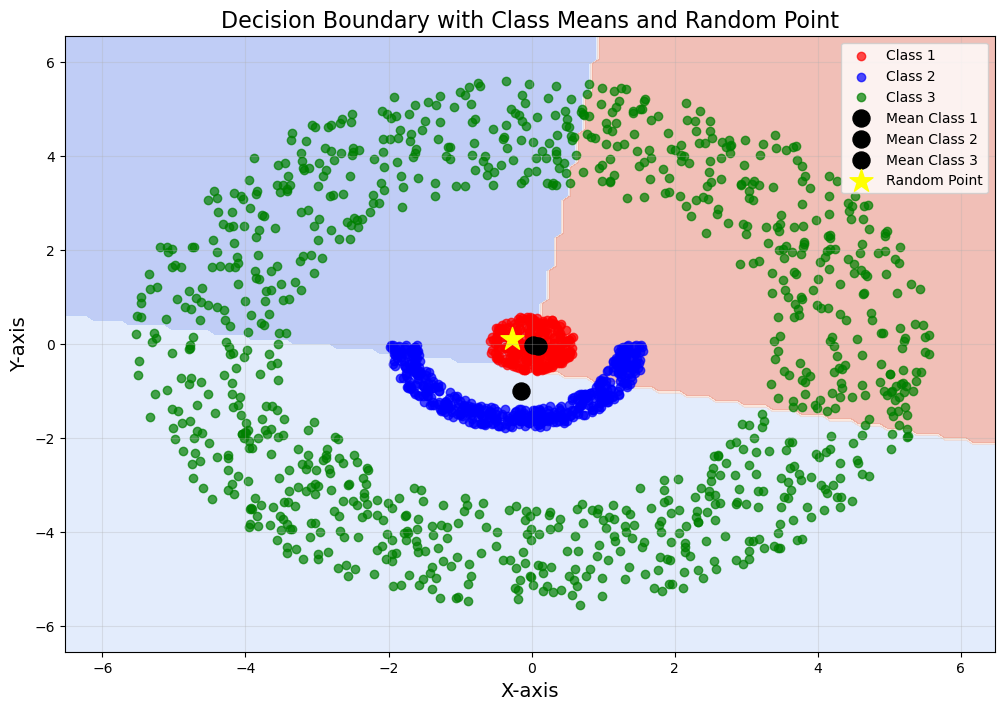

In [3]:
# Mapping of class names to numeric labels
class_label_map = {'Class 1': 0, 'Class 2': 1, 'Class 3': 2}
label_class_map = {v: k for k, v in class_label_map.items()}  # Reverse mapping for legend

# Function to calculate Euclidean distance manually
def calculate_distance(point1, point2):
    distance = 0  # Initialize distance
    for i in range(len(point1)):
        difference = point1[i] - point2[i]
        distance += difference * difference  # Square the difference
    return distance ** 0.5  # Take the square root of the sum

# Function to classify a point by finding the closest class mean
def classify_point(point, class_means):
    distances = {}
    for class_name, mean in class_means.items():
        distances[class_name] = calculate_distance(point, mean)
    return min(distances, key=distances.get)

# Create a mesh grid for decision boundary
h = 0.1  # Step size for mesh
x_min, x_max = X['X'].min() - 1, X['X'].max() + 1
y_min, y_max = X['Y'].min() - 1, X['Y'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict class for each point in the grid
Z = np.array([class_label_map[classify_point([x, y], class_means)]
              for x, y in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(12, 8))
plt.contourf(xx, yy, Z, alpha=0.4, cmap='coolwarm', levels=len(class_label_map))
plt.scatter(data[data['Label'] == 0]['X'], data[data['Label'] == 0]['Y'], color='red', label='Class 1', alpha=0.7)
plt.scatter(data[data['Label'] == 1]['X'], data[data['Label'] == 1]['Y'], color='blue', label='Class 2', alpha=0.7)
plt.scatter(data[data['Label'] == 2]['X'], data[data['Label'] == 2]['Y'], color='green', label='Class 3', alpha=0.7)
plt.scatter(mean_class1[0], mean_class1[1], color='black', marker='o', s=150, label='Mean Class 1')
plt.scatter(mean_class2[0], mean_class2[1], color='black', marker='o', s=150, label='Mean Class 2')
plt.scatter(mean_class3[0], mean_class3[1], color='black', marker='o', s=150, label='Mean Class 3')
plt.scatter(random_point[0], random_point[1], color='yellow', marker='*', s=300, label='Random Point')
plt.title("Decision Boundary with Class Means and Random Point", fontsize=16)
plt.xlabel("X-axis", fontsize=14)
plt.ylabel("Y-axis", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()


Precision: [0.5862068965517241, 0.4227941176470588, 0.6906077348066298]
Recall: [0.6375, 0.732484076433121, 0.41254125412541254]
F1-Score: [0.6107784431137724, 0.5361305361305361, 0.5165289256198347]


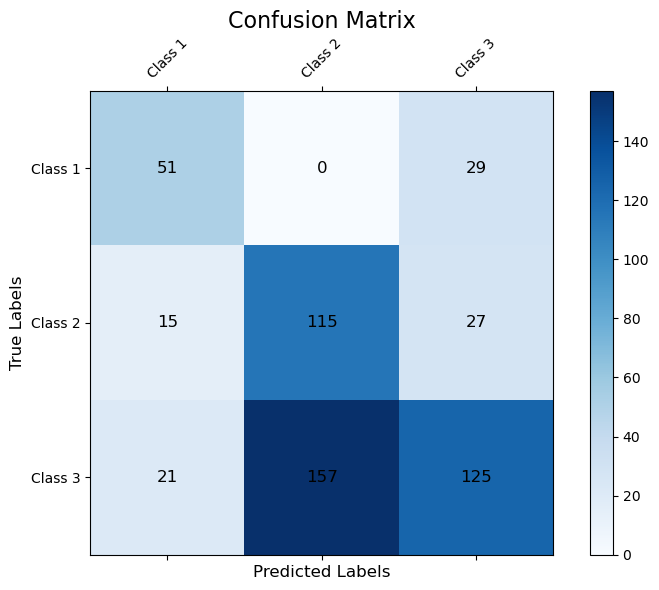

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset and assign labels
data = pd.read_csv(r'C:\Users\nitip\OneDrive\Desktop\dec2024\Group04[1]\Group04\NLS_Group04.txt', delimiter=' ', header=None)
data = data.iloc[:, :2]  # Slice the first two columns
data.columns = ['X', 'Y']

# Assign class labels
class_labels = np.concatenate([np.zeros(300), np.ones(500), np.full(1000, 2)])
data['Label'] = class_labels

# Split data into features (X) and labels (y)
X = data[['X', 'Y']]  # Features
y = data['Label']     # Labels

# Split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Compute class means
class_means = {
    0: X_train[y_train == 0].mean(axis=0),
    1: X_train[y_train == 1].mean(axis=0),
    2: X_train[y_train == 2].mean(axis=0),
}

# Function to classify a point based on the closest class mean
def classify_point(point, class_means):
    distances = [np.linalg.norm(point - class_mean) for class_mean in class_means.values()]
    return min(class_means, key=lambda x: distances[x])

# Predict class labels for the test set
y_pred = [classify_point(row[['X', 'Y']].values, class_means) for _, row in X_test.iterrows()]

# Compute the confusion matrix
conf_matrix = np.zeros((3, 3), dtype=int)
for true_label, pred_label in zip(y_test, y_pred):
    conf_matrix[int(true_label)][int(pred_label)] += 1

# Calculate Precision, Recall, and F1-Score for each class
precision = []
recall = []
f1_score = []

for i in range(3):
    tp = conf_matrix[i][i]  # True Positives
    fp = sum(conf_matrix[j][i] for j in range(3)) - tp  # False Positives
    fn = sum(conf_matrix[i][j] for j in range(3)) - tp  # False Negatives
    
    # Calculate Precision, Recall, and F1 Score
    precision_value = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall_value = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_value = (2 * precision_value * recall_value) / (precision_value + recall_value) if (precision_value + recall_value) > 0 else 0

    precision.append(precision_value)
    recall.append(recall_value)
    f1_score.append(f1_value)

# Print Precision, Recall, and F1-Score
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1_score)

# Plot the confusion matrix as a graphical table (heatmap)
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(conf_matrix, cmap="Blues")

# Add color bar
fig.colorbar(cax)

# Add labels for rows and columns
ax.set_xticks(np.arange(3))
ax.set_yticks(np.arange(3))

# Set labels for each class
ax.set_xticklabels(['Class 1', 'Class 2', 'Class 3'])
ax.set_yticklabels(['Class 1', 'Class 2', 'Class 3'])

# Rotate the tick labels for better visibility
plt.xticks(rotation=45)

# Add title and axis labels
plt.title("Confusion Matrix", fontsize=16)
plt.xlabel("Predicted Labels", fontsize=12)
plt.ylabel("True Labels", fontsize=12)

# Annotate each cell with the numeric value (number of instances)
for i in range(3):
    for j in range(3):
        ax.text(j, i, str(conf_matrix[i][j]), ha="center", va="center", color="black", fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()
